# Phase II Revisions


Use the following cell (or more if you need them) to make any needed revisions or additions to your Phase II data cleaning. If you were not recommended to make any changes, and don't have any new data sources for Phase III, you may skip this part.


In [218]:
#SLIGHT MODIFICATION TO DOWNLOADED DATASET REQUIREMENT-  'if 'delis' not in i:'
import pandas as pd
import numpy as np
import json
from pprint import pprint
def data_parser():
    df = pd.read_csv('/Users/ahiray/Desktop/CS_2316_Final_Project/us-income-quarterly 2.csv', delimiter = ';')
    df = df.drop(['Depreciation & Amortization','SimFinId','Currency','Shares (Basic)' ,'Net Income (Common)', 'Non-Operating Income (Loss)','Pretax Income (Loss)','Cost of Revenue','Income Tax (Expense) Benefit, Net', 'Income (Loss) from Continuing Operations','Operating Income (Loss)','Report Date', 'Operating Income (Loss)', 'Publish Date', 'Restated Date', 'Selling, General & Administrative','Shares (Diluted)', 'Abnormal Gains (Losses)', 'Net Extraordinary Gains (Losses)'], axis=1)
    df = df.fillna(0)
    data = {}
    fiscal_periods = {'Q1': .1, 'Q2': .2, 'Q3': .3, 'Q4': .4}
    for i,j in df.groupby('Ticker', as_index=False):
        if 'delis' not in i: #update
            data[i] = j.set_index(j['Fiscal Year'].values + [fiscal_periods[i] for i in j['Fiscal Period'].values]).drop(['Fiscal Year', 'Fiscal Period'], axis=1)
            data[i] = data[i].to_json()
    data['Tickers'] = list(data.keys())
    json.dump(data, open('corporate.json', 'w'))
    return 'Complete'

def get_corporate():
    with open('/Users/ahiray/Desktop/CS_2316_Final_Project/corporate.json', 'r') as f: 
        data = json.load(f)
        big_df = pd.DataFrame(pd.DataFrame(json.loads(data['A'])))
        del big_df['Ticker']
        for i in data['Tickers'][1:]:
            df = pd.DataFrame(json.loads(data[i]))
            del df['Ticker']
            big_df = pd.concat([big_df, df], axis=1)
        big_df = big_df.sort_index(ascending=True)
        big_df = big_df.iloc[2:-2]
        return big_df
############ Function Call ############
get_corporate()




############ Function Call ############


Done parsing


,Revenue,Gross Profit,Operating Expenses,Research & Development,"Interest Expense, Net","Pretax Income (Loss), Adj.",Net Income,Revenue,Gross Profit,Operating Expenses,...,"Interest Expense, Net","Pretax Income (Loss), Adj.",Net Income,Revenue,Gross Profit,Operating Expenses,Research & Development,"Interest Expense, Net","Pretax Income (Loss), Adj.",Net Income
2016.1,1.028000e+09,537000000.0,-382000000.0,-78000000.0,-16000000.0,142000000.0,121000000.0,NaN,NaN,NaN,...,12377.0,-4252640.0,-4281374.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016.2,1.019000e+09,530000000.0,-399000000.0,-81000000.0,-15000000.0,117000000.0,91000000.0,NaN,NaN,NaN,...,18118.0,-6285666.0,-6229389.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016.3,1.044000e+09,542000000.0,-396000000.0,-86000000.0,-14000000.0,134000000.0,124000000.0,2.329000e+09,361000000.0,-281000000.0,...,22747.0,-5981081.0,-5981081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016.4,1.111000e+09,588000000.0,-405000000.0,-84000000.0,-16000000.0,151000000.0,126000000.0,2.537000e+09,435000000.0,-278000000.0,...,26980.0,-6797516.0,-6896663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017.1,1.067000e+09,574000000.0,-368000000.0,-79000000.0,-16000000.0,193000000.0,168000000.0,2.655000e+09,632000000.0,-257000000.0,...,76885.0,-7259021.0,-7259021.0,3436000.0,2513000.0,-2030000.0,0.0,-121000.0,362000.0,353000.0
2017.2,1.102000e+09,592000000.0,-391000000.0,-84000000.0,-15000000.0,191000000.0,164000000.0,2.859000e+09,570000000.0,-268000000.0,...,124535.0,-8323479.0,-8323479.0,5042000.0,4022000.0,-2088000.0,0.0,-394000.0,1540000.0,1504000.0
2017.3,1.114000e+09,596000000.0,-395000000.0,-87000000.0,-13000000.0,193000000.0,175000000.0,2.964000e+09,624000000.0,-272000000.0,...,161930.0,-8311205.0,-8311205.0,6820000.0,5473000.0,-2538000.0,0.0,-691000.0,2244000.0,2200000.0
2017.4,1.189000e+09,647000000.0,-414000000.0,-89000000.0,-13000000.0,226000000.0,177000000.0,3.174000e+09,835000000.0,-265000000.0,...,156204.0,-8118599.0,-8118599.0,8134000.0,6605000.0,-3013000.0,0.0,-244000.0,3348000.0,3308000.0
2018.1,1.211000e+09,670000000.0,-441000000.0,-94000000.0,-11000000.0,233000000.0,-320000000.0,3.090000e+09,709000000.0,-269000000.0,...,175184.0,-12306334.0,-12306334.0,6876000.0,5640000.0,-3686000.0,0.0,-115000.0,1839000.0,1920000.0
2018.2,1.206000e+09,643000000.0,-433000000.0,-92000000.0,-9000000.0,227000000.0,205000000.0,3.579000e+09,947000000.0,-265000000.0,...,186304.0,-12007233.0,-12007233.0,7573000.0,6243000.0,-3528000.0,0.0,-37000.0,2678000.0,2418000.0


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:  https://simfin.com/data/bulk
*   Web Collection #1 Source: https://www.barchart.com/etfs-funds/performance/percent-change/advances?timeFrame=10y
*   Web Collection #2 Source:  https://data.nasdaq.com/api/v3/datasets/



## Insights

In [1671]:
import pandas as pd
import json 
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
def create_grouped_df():
    #load datasets
    spy_confidence_institutional= pd.read_csv('spy_confidence_institutional.csv', index_col=0).rename(columns={'0': "Institutional Confidence"})
    spy_confidence_individual= pd.read_csv('spy_confidence_individual.csv', index_col=0).rename(columns={'0': "Individual Confidence"})
    spy_crash_institutional = pd.read_csv('spy_crash_institutional.csv', index_col=0).rename(columns={'0': "Institutional Crash Confidence"})
    spy_crash_individual= pd.read_csv('spy_crash_individual.csv', index_col=0).rename(columns={'0': "Individual Crash Confidence"})
    grouped_df =  pd.concat([spy_confidence_institutional,spy_confidence_individual, spy_crash_institutional, spy_crash_individual ])
    del grouped_df['1']
    #prepare for insight1()
    for i in grouped_df.columns: 
        grouped_df[i] = grouped_df[i].dropna()
    grouped_df = grouped_df.dropna().sort_index()
    return grouped_df
    
def insight1():
    #normalize dataframe
    grouped_df = create_grouped_df()
    grouped_df = (grouped_df - grouped_df.mean()) / grouped_df.std()
    grouped_df.rolling(3).mean().to_csv('insight1.csv')
    return grouped_df.rolling(3).mean().describe()

############ xFunction Call ############
 
insight1()


,Institutional Confidence,Individual Confidence,Institutional Crash Confidence,Individual Crash Confidence
count,966.000000,966.000000,966.000000,966.000000
mean,-0.000983,0.001263,0.002071,0.002170
std,0.971978,0.966068,0.976334,0.976980
min,-3.504649,-3.549634,-3.095255,-3.801817
25%,-0.547498,-0.568787,-0.500968,-0.577369
50%,0.043972,-0.010053,0.097390,-0.003171
75%,0.628154,0.589813,0.544421,0.451448
max,3.677236,3.351139,3.455512,3.579849


### Insight 1 Explanation

This is perhaps the most important analysis I do during my project. The Investor Behavior Project led by Professor Schiller at Yale (highly recommend taking his online classes) is a 30+ project involving accurately producing institutional and individual sentiment regarding the market. After stationarizing the data in Phase II, I have normalized the data (bounded the mean sentiment to 0 (approx) and attempted to create a gaussian distribution. While df.describe is very simple, the results are extremely fascinating. 

The first piece of analysis is regarding the mean. Althought subtle, the mean confidence for individuals BOTH when it comes to growth AND crash is the higher than that of institutional confidence. This demonstrates the well known concept of prospect theory- Individuals are more averse to risk and place more weight on gains. This also ties into explaining why the standard deviation of Individual Crash Confidence is actually higher than Individual Confidence- more spread and a thicker tail for the distribution. 

One thing to note about the data is that while the diffrences numerically are very small they spatially have a large affect- see insight for a visualization of the kernal density estimations showing the probability distribution. 

An important component also involved comparing institutional sentiment to consumer sentiment. Based on the quartiles, for both confidence and crash confidence institutional sentiment is skewed to the left. This indicates that institutional investors all in all are much more bullish yet cautious of the market- hence explaining why hedge funds and investment banks perform better than the individual investor. 

Gross Profit: [('2020.1', 29.0781), ('2020.2', 11.1504), ('2020.3', 15.7541), ('2020.4', 0.0)]
Interest Expense, Net: [('2020.1', 0.014), ('2020.2', 0.0063), ('2020.3', 0.017), ('2020.4', 0.0)]
Research & Development: [('2020.1', 0.0143), ('2020.2', 0.0094), ('2020.3', 0.0015), ('2020.4', 0.0)]
Revenue: [('2020.1', 8.9929), ('2020.2', 14.8175), ('2020.3', 68.0315), ('2020.4', 0.0)]
Pretax Income (Loss), Adj.: [('2020.1', 0.0), ('2020.2', 0.0219), ('2020.3', 96.9505), ('2020.4', 0.0)]
Operating Expenses: [('2020.1', 0.0184), ('2020.2', 0.3035), ('2020.3', 0.7369), ('2020.4', 0.0)]
Net Income: [('2020.1', 0.0), ('2020.2', 0.0), ('2020.3', 7.2374), ('2020.4', 0.0)]


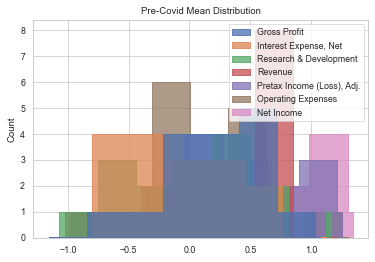

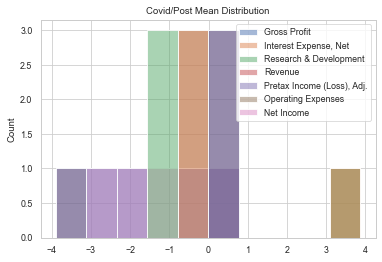

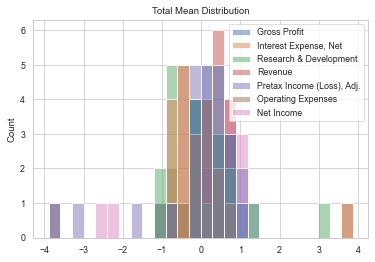

In [1662]:
from sklearn import preprocessing
import seaborn as sns
def insight2():
    df = get_corporate()
    #normalize data for ttest
    stats = pd.DataFrame()
    cols = list(set(df.loc['2016.1'].index))
    for i in df.index:
        for j in cols: 
            stats.loc[i,j]= df.loc[i].fillna(0)[j].mean()
    stats=(stats-stats.mean())/stats.std()
    test = stats.iloc[-4:]
    stats.to_csv('insight2.csv')
    #apply 1-sample ttest 
    from scipy.stats import ttest_1samp
    for j in cols:
        tset, pval = ttest_1samp(stats.iloc[:-4][j], test[j])
        print(f'{j}: {list(zip(test.index,(pval * 100).round(4)))}')
    #visualize data for 
    sns.histplot(stats.iloc[:-4], element="step", multiple='dodge').set(title='Pre-Covid Mean Distribution')
    plt.show()
    sns.histplot(test).set(title='Covid/Post Mean Distribution')
    plt.show()
    sns.histplot(stats).set(title='Total Mean Distribution')
    plt.show
    return





############ Function Call ############
insight2()

### Insight 2 Explanation
##### Clarification: I understand insights are not visualizations, but the complexity of some analysis is better explained with both numerical and visual explanations. Pls don't dock points, I have 5 unique visualizations too :)

This insight specifically examines the impact of covid- mainly to see if there was a shift in the business earnings within the United States. To do this, I used business data from all the companies in the S&P 500 and created a simple Ttest to observe whether or not the aggregate numbers during covid would be statistically signficant pre-covid. Normalizing the data allowed to effectively understand how many standard deviations away the results (or numbers) during 2021 (all four quarters) was. As you can see, with the exception of Gross Profit and Revenue all the other data was statistically signficant- indicating that COVID had an undeniable impact on businesses. While this is obvious, the real analysis is that despite all the changes, in R&D, Operating Expenses, Income, etc- Gross Profit and Revenue were not statistically significant. This is extraordinary and demonstrates that money was still coming from some source other than the normal consumer base- question is who? 

The basic visualizations represent a histogram showing the standard deviations a quarter's data was from the mean (of zero). As you can see the second histogram represents the reports during covid and is significantly farther from zero than before.

In [1664]:
#!pip install yfinance
import re
import yfinance as yf
def insight3():
    declines = pd.read_csv('Percent-Change Declines.csv')
    decline_tickers = " ".join(declines['Symbol'].to_list())
    advanced = pd.read_csv('Percent-Change Advances.csv')
    advanced_tickers = " ".join(advanced['Symbol'].to_list())
    advanced_data = yf.download(advanced_tickers, start="2010-01-01", end="2021-11-30")
    decline_data = yf.download(decline_tickers, start="2010-01-01", end="2021-11-30")
    advanced_data = advanced_data['Adj Close'].pct_change()
    decline_data = decline_data['Adj Close'].pct_change()
    
    del advanced_data['SYMBOL']
    del decline_data['SYMBOL']
    pd.concat([advanced_data.rolling(5).std().dropna().mean(axis=1), decline_data.rolling(5).std().dropna().mean(axis=1)]).to_csv('insight3.csv')
    
    return advanced_data.rolling(5).std().dropna().mean(axis=1), decline_data.rolling(5).std().mean(axis=1)

def insight_3_calcs():
    #stat calcs
    from scipy import stats
    advanced_data, decline_data = insight3()
    df = pd.concat([advanced_data,decline_data], axis=1).dropna()
    from scipy import stats
    print(f'\n \nCorrelation Between Advancing and Declining Data: {stats.pearsonr(df[0], df[1])}')
    print(f'Covariance Matrix Between Advancing and Declining Data: \n{np.cov(df[0], df[1])}')
    diffData = df[0]- df[1]
    print(f'Skewness of the difference in Advancing and Declining Variance: {stats.describe(diffData).skewness}')
    print(f'Kurtosis of the difference in Advancing and Declining Variance: {stats.describe(diffData).kurtosis}')


############ Function Call ############
insight_3_calcs()

[*********************100%***********************]  101 of 101 completed

1 Failed download:
- SYMBOL: No data found, symbol may be delisted
[*********************100%***********************]  101 of 101 completed

1 Failed download:
- SYMBOL: No data found, symbol may be delisted

 
Correlation Between Advancing and Declining Data: (0.8512325387448377, 0.0)
Covariance Matrix Between Advancing and Declining Data: 
[[4.72083335e-05 3.13912844e-05]
 [3.13912844e-05 2.88073341e-05]]
Skewness of the difference in Advancing and Declining Variance: 1.128802986921222
Kurtosis of the difference in Advancing and Declining Variance: 5.661006523421829


### Insight 3 Explanation

Stocks go up and down- but what distinguished good stocks from bad. Moreover, how can us as normal yellow jackets be able to make quantitative decisions to make right choices? This insight contextualizes just what differentiates a good and bad investment... not much. I collected data from yahoo finance for the best performing 101 etfs in the last 10 years and the 101 worst performing ETFS in the last decade (we're talking -600%+). Obviously time series analysis would so big differences over the years... right? WRONG. In fact, the succesful and terrible investments had a correlation of .85 over the years. This is an unbelievable statistic because it reifies a point only quants and technical analysts accept and adjust to- most of the markets movement happens very sudden and very unpredictably. Moral of the story- don't go finding the next Gamestop on your own- to the Moon will become asking for money from your Mom. 

However, the covariance matrix better highlights this. What the left diagonal shows is a very low covariance- almost close to zero. This indicates that both the advancing and declining time series move independently... yet they have a high correlation as well. While this is not a common case, a high correlation and a covariance close to zero indicates that the magnitude of shifts that occur during uncorrelated periods drives down the covariance. This pertains to why the declining stocks have dropped so much while the advancing etfs are succesful. Yet again this shows why speculating on individual investments is generally a bad idea. 

The last two pieces of analysis are pertaining to a distribution of the difference between the advancing and declining data. Moreover I wanted to see the skewness of the daily difference between the data- shining light to volatility and the distribution of the data. The results were pretty expected however. The skewness of the distribution was severely skewed to the right- indicating the variance of the poorer performing stocks was astronomically higher than the better performing stocks. Generally a skewness greater than 1 indicates severe skewness. On the other hand, kurtosis measures the "tails" of the distribution. Moreover, how thick they are. A normal distribution has a kurtosis around 3. 5.7 is a very high number and indicated that there is a higher probability for severe volatility randomly. The stock market isn't Gaussian, and people have learned that the hard way. 


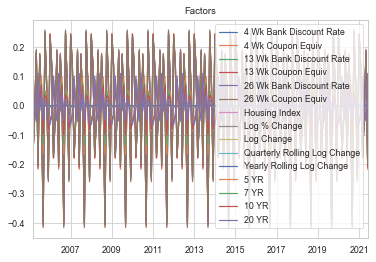

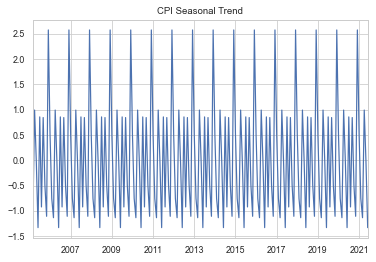

Max Error (Best Case 0): 0.5190100711396219
Explained Variance (Best Case 1): 0.967364751769792
Mean Squared Error (Best Case Zero): 0.033572162158894206
R2 (Best Case 1): 0.9673214987887899


In [1666]:
from statsmodels.tsa.seasonal import seasonal_decompose
def insight4():
    #load dataframes
    #handle dataframe index manipulation
    cpi =pd.read_csv('cpi.csv', index_col=0).rename(columns={'1': "CPI"})
    real_yield = pd.read_csv('real_yield.csv', index_col=0)
    bill_rates = pd.read_csv('bill_rates.csv', index_col=0)
    housing_pricing_index= pd.read_csv('housing_pricing_index.csv', index_col=0, names=["Housing Index"]).multiply(100)
    cpi.index.freq= 'M'
    
    data =  pd.merge(bill_rates, pd.merge(housing_pricing_index, pd.merge(cpi, real_yield, left_index=True, right_index=True),left_index=True, right_index=True),left_index=True, right_index=True).rolling(7).mean().dropna()
    data.index = pd.DatetimeIndex(data.index)
    cpi = data['CPI']
    cpi = cpi.asfreq(freq='M').fillna(cpi.mean())
    cpi.index.freq = 'M'
    cpi = sm.tsa.seasonal_decompose(cpi, model='additive').seasonal
    del data['CPI']
    data = data.asfreq(freq='M').fillna(data.mean())
    data.index.freq = 'M'
    #MinMaxScaler to normalize data + 
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    
    #Seasonal Decomposition
    for i in data.columns:
        data[i]  = sm.tsa.seasonal_decompose(data[i], model='additive').seasonal
    data.plot(kind='line', title='Factors')
    plt.show()
    cpi.plot(kind='line', title='CPI Seasonal Trend')
    plt.show()
    
    #ML Preprocessing
    data.to_csv('insight4.csv')
    X = data
    y = cpi.shift(-1).dropna() 
    current_X = X.iloc[-1]
    X = X.iloc[:-1]
    
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import SGDRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn import svm
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import VotingRegressor
    from sklearn.model_selection import train_test_split
    import time
    from sklearn.metrics import max_error, explained_variance_score, mean_squared_error, r2_score
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)
    #Create Voting Classifier Model
    gbr = GradientBoostingRegressor()
    rfr = RandomForestRegressor()
    lr = LinearRegression()
    svm = svm.SVR()
    sgd = SGDRegressor()
    neighbor = KNeighborsRegressor()
    voting_reg = VotingRegressor(estimators=[('gb', gbr), ('rf', rfr), ('lr', lr), ('svm', svm), ('sgd', sgd), ('knn', neighbor)], weights=[.2,.2,.2,.1,.1,.2] )
    #Create GridSearch model 
    parameters = {'gb__loss':['squared_error', 'huber'], 'gb__n_estimators':[10,20,50,100], 'rf__n_estimators':[10,20,50,100], 'knn__n_neighbors':[5,10,20,50] }
    clf = GridSearchCV(voting_reg, parameters).fit(X_train, y_train)
    clf_predict = clf.predict(X_test)
    print(f'Max Error (Best Case 0): {max_error(y_test, clf_predict)}')
    print(f'Explained Variance (Best Case 1): {explained_variance_score(clf_predict, y_test)}')
    print(f'Mean Squared Error (Best Case Zero): {mean_squared_error(clf_predict, y_test)}')
    print(f'R2 (Best Case 1): {r2_score(clf_predict, y_test)}')
    return



############ Function Call ############
insight4()



### Insight 4 Explanation

Machine learning is often used to create prediction and forecasting models. I decided it would be very interesting to develop a model to forecast inflation- mainly changes in the CPI. One of the extremely beneficial parts (and hypothesis I have) is that inflation is seasonal i.e different periods have different increases in seasonality. This is clearly shown by the plots after seasonal decomposition via additive detrending. The data almost looks copy pasted every year- however thats how strong the seasonal trend is. Having such stationary data makes it much easier for regression ml models. Using treasury bill rates, the housing index, and rolling log cpi data, I implemented a voting classifier regressor. In short, it is an aggregate of multiple models and creates a forecasting method by utilizing the average of all the models. Furthermore, the data is lagged, meaning to predict the cpi for the current month the factors must be of the month before. This prevents overfitting and maintains real life applicability (to some extent). GridSearchCV is a form of hyper-parametricizing data such that the best combination of model values are given to increase the accuracy of the model. 

75% of the time series data was used while 25% was used to test the accuracy. The result of this model were impressive. While the Max Error has no context on it self, for a forecasting method that is pretty good. However, the explained variance was very close to 1, demonstrating that most of the variations between the predicted results and the actual values are accounted for by the modelling- showing accuracy. The mean squared error is very low which symbolizes a small difference between the predicted and actual results. Lastly, the R2 shows a very high correlation between the forecasted predictions and the actual results. All of these results show that the model in fact is succesful given the dataset, and with a little more testing and increasing complexity could perhaps have potential to consistently forecast inflation.  

S&P Composite
                               AutoReg Model Results                               
Dep. Variable:               S&P Composite   No. Observations:                  242
Model:             Restr. Seas. AutoReg(9)   Log Likelihood                -144.149
Method:                    Conditional MLE   S.D. of innovations              0.449
Date:                     Fri, 10 Dec 2021   AIC                            320.297
Time:                             00:52:58   BIC                            375.514
Sample:                         10-31-2000   HQIC                           342.563
                              - 02-29-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2373      0.101      2.345      0.019       0.039       0.436
s(2,12)             -0.0711      0.142     -0.500      0.61

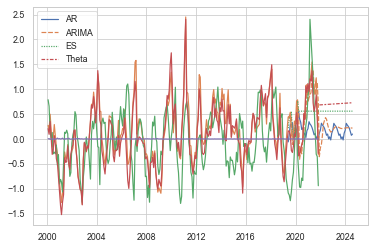

Long Interest Rate
                               AutoReg Model Results                               
Dep. Variable:          Long Interest Rate   No. Observations:                  242
Model:             Restr. Seas. AutoReg(9)   Log Likelihood                -136.640
Method:                    Conditional MLE   S.D. of innovations              0.435
Date:                     Fri, 10 Dec 2021   AIC                            305.281
Time:                             00:52:59   BIC                            360.498
Sample:                         10-31-2000   HQIC                           327.547
                              - 02-29-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0338      0.098      0.346      0.729      -0.158       0.226
s(2,12)                   0.0721      0

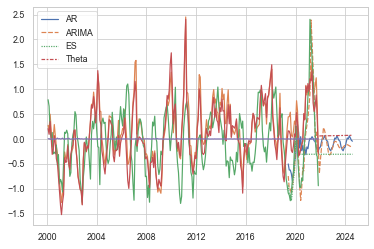

Cyclically Adjusted PE Ratio
                                 AutoReg Model Results                                  
Dep. Variable:     Cyclically Adjusted PE Ratio   No. Observations:                  242
Model:                  Restr. Seas. AutoReg(9)   Log Likelihood                -143.633
Method:                         Conditional MLE   S.D. of innovations              0.448
Date:                          Fri, 10 Dec 2021   AIC                            319.265
Time:                                  00:52:59   BIC                            374.482
Sample:                              10-31-2000   HQIC                           341.531
                                   - 02-29-2020                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2241      0.101      

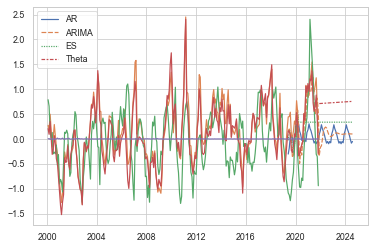

spy_dividend
                               AutoReg Model Results                               
Dep. Variable:                spy_dividend   No. Observations:                  242
Model:             Restr. Seas. AutoReg(9)   Log Likelihood                1055.820
Method:                    Conditional MLE   S.D. of innovations              0.003
Date:                     Fri, 10 Dec 2021   AIC                          -2079.640
Time:                             00:53:00   BIC                          -2024.423
Sample:                         10-31-2000   HQIC                         -2057.374
                              - 02-29-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.646e-05      0.001     -0.028      0.978      -0.001       0.001
s(2,12)             0.0004      0.001      0.510      0.610    

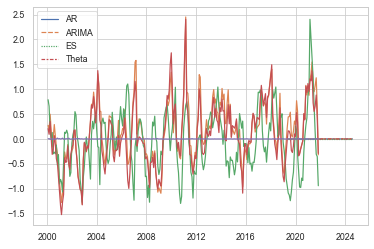

In [1677]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.forecasting.theta import ThetaModel
from datetime import timedelta
from matplotlib import pyplot
def insight5():
    #load data and clean for ts analysis
    spy_composite = (pd.read_csv('spy_composite.csv', index_col=0).pct_change().rolling(5).mean() -  
        \pd.read_csv('spy_composite.csv', index_col=0).pct_change().rolling(7).mean().mean())/ 
        \pd.read_csv('spy_composite.csv', index_col=0).pct_change().rolling(7).std()
    del spy_composite['CPI']
    multpl= pd.read_csv('multpl.csv', index_col=0)
    comb_df = pd.merge(spy_composite, multpl, left_index=True, right_index=True)
    del comb_df['Real Price']
    del comb_df['Real Earnings']
    del comb_df['Real Dividend']
    del comb_df['spy_monthly_inflation']
    del comb_df['spy_pe_ratio']
    del comb_df['Dividend']
    del comb_df['Earnings']
    del comb_df['schiller_pe_ratio']
    comb_df.index = pd.DatetimeIndex(comb_df.index)
    comb_df.index.freq = 'M'
    comb_df.to_csv('insight5.csv')
    for i in comb_df.columns:
        print(i)
        forecast_plot = pd.DataFrame()
        ar_model = AutoReg(comb_df[i].iloc[:-20], lags=[2,7,9], seasonal=True).fit()
        ar_pred = ar_model.predict(comb_df.iloc[-30].name, comb_df.iloc[-1].name+ timedelta(days=1000))
        print(ar_model.summary())
        
        arima = ARIMA(comb_df[i], order=(7,1,0))
        arima_model = arima.fit()
        arima_pred = arima_model.predict(comb_df.iloc[-30].name, comb_df.iloc[-1].name+ timedelta(days=1000))
        print(arima_model.summary())
        
        es_model = ExponentialSmoothing(comb_df[i].iloc[:-20], seasonal=None, seasonal_periods=4).fit()
        es_model_pred = es_model.predict(comb_df.iloc[-30].name, comb_df.iloc[-1].name+ timedelta(days=1000))
        print(es_model.summary())
        
        theta_model = ThetaModel(comb_df[i]).fit()
        theta_model_pred = theta_model.forecast(33)
        print(theta_model.summary())

        ar_pred = ar_pred.tz_localize(None)
        arima_pred = arima_pred.tz_localize(None)
        es_model_pred = es_model_pred.tz_localize(None)
        theta_model_pred = theta_model_pred.tz_localize(None)
        forecast_plot['AR'] = ar_pred
        forecast_plot['ARIMA'] = arima_pred
        forecast_plot['ES'] = es_model_pred
        forecast_plot['Theta'] = theta_model_pred
        sns.set_style("whitegrid")
        sns.set_context("paper")
        fig = sns.lineplot(data=forecast_plot)
        plt.show(plt.plot(comb_df))
        plt.show(fig)
        
    return 






############ Function Call ############
insight5()

### Insight 5 Explanation
This is perhaps the most complicated insight. Regressive models have been used for a few years to forecast volatility and changes in time series models. I attempt to use 4 of these models with the hope of generating valuable insight and analysis.

Each model.summary has a lot of information. Some of the key concepts include observing the skewness, heteroskedacity, and coefficients of modelling. Another important analysis is "innovation"- the difference between the forecasted result and the actual result. Generally a lower innovation is good, but as these models demonstrate it is extremely hard and improbably due to the complexity of these time series data. To determine how good a model is you can observe the log-likelyhood (the probability of this model being a good fit for the data). Generally the higher the number the better- clearly not like these models. 

At the end I also have a visual of the forecasted data vs the actual. As you can see, the time series data is too complicated for the model to understand so after a few steps it becomes a straight line. Hypertuning these models and providing cleaner data can help this. 

## Data Visualizations

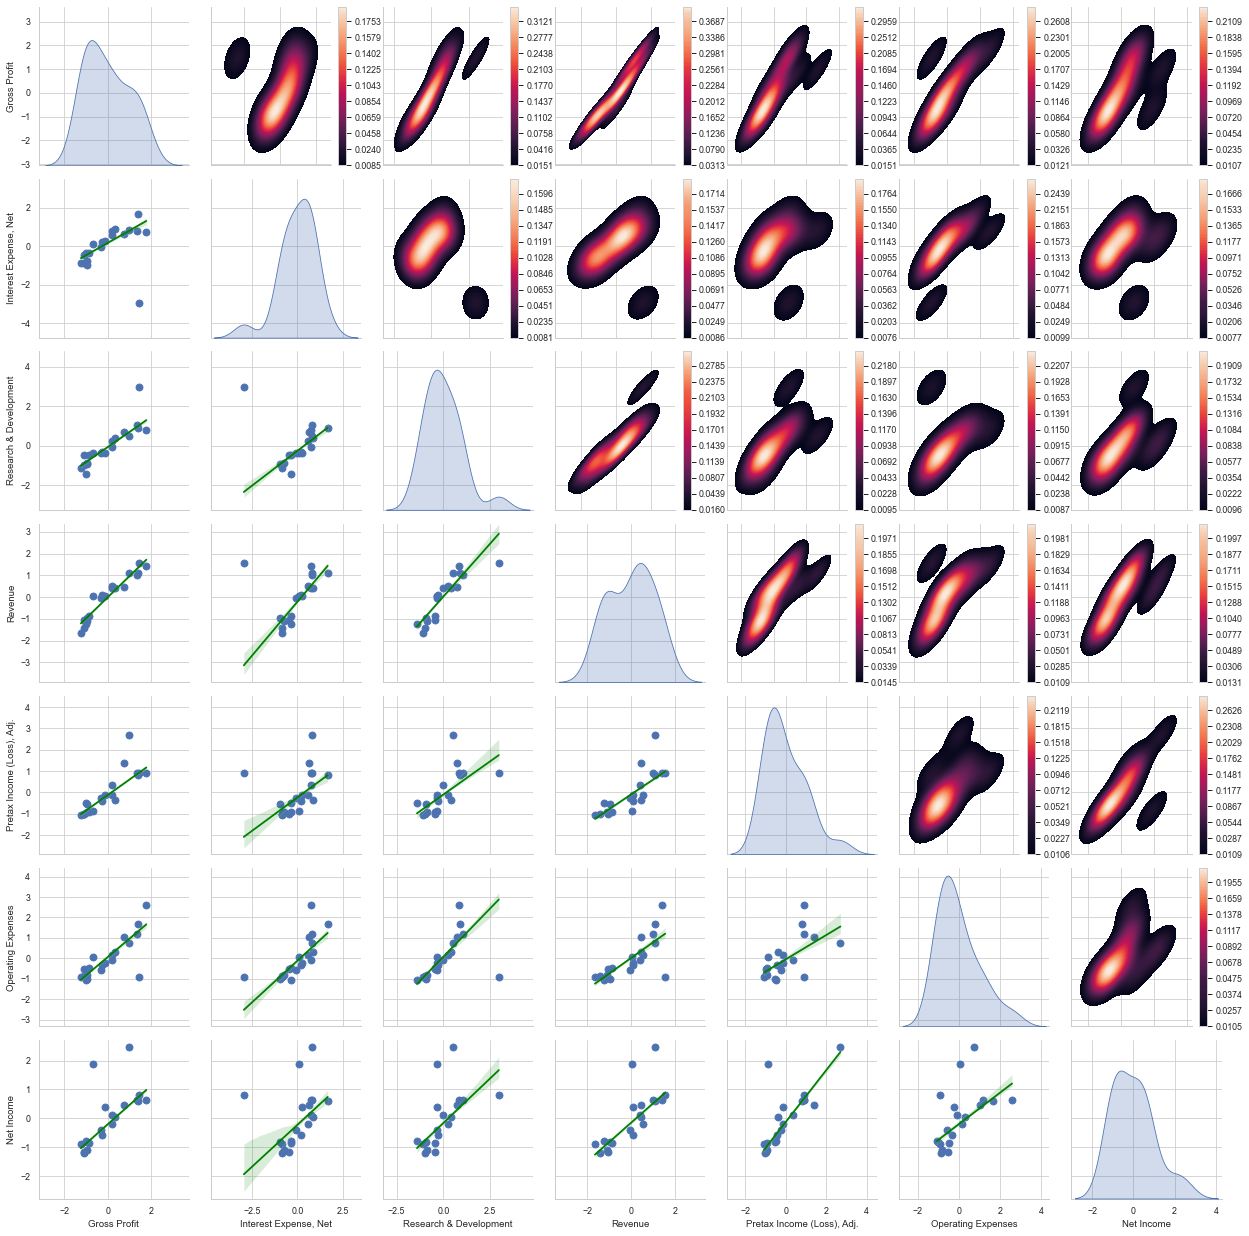

In [1323]:
def visual1():
    df = get_corporate()
    stats = pd.DataFrame()
    cols = list(set(df.loc['2016.1'].index))
    for i in df.index:
        for j in cols: 
            stats.loc[i,j]= df.loc[i].dropna()[j].std()
    stats=(stats-stats.mean())/stats.std()
    sns.set_style("whitegrid")
    sns.set_context("paper")
    g = sns.PairGrid(stats)
    g.map_lower(sns.regplot, lowess=False, robust=True, ci=40, 
                /x_estimator=np.mean,line_kws={'color': 'green'})
    g.map_upper(sns.kdeplot, cbar=True, fill=True, levels=100, cmap='rocket')
    g.map_diag(sns.kdeplot, fill=True, cmap='mako', common_grid=True)
    return g
        



############ Function Call ############
visual1()

### Visualization 1 Explanation

This is a pairgrid in seaborn which shows the relation between multiple variables. The kernal density estimation in the diagonal shows the distribution of the data in respect to its normalized value. As u can see, most data has positively skewed data. This shows that all in all the past few years have actually not been to good for these buesinesses- and that hype is a prevalent part of financial markets. The lower diagonal is the scatterplot relation between each variable- and a lienar regression forecast. Theoretically with good data the line of best fit can be used to accurately show and predict the linear relationship between two variables. All in all, almost every variable is positively related and there is a nice trend line to model that. The upper right diagram is a kernal density plot- it contours the scatterplot and identifies the most densely populated areas of the scatterplot. This are useful for probabilities and understanding data. You can also very clearly see large black circles away from the body of the data showing the impact of Covid. 

[*********************100%***********************]  101 of 101 completed

1 Failed download:
- SYMBOL: No data found, symbol may be delisted
[*********************100%***********************]  101 of 101 completed

1 Failed download:
- SYMBOL: No data found, symbol may be delisted
Date
2020-12-29    0.011828
2020-12-30    0.010294
2020-12-31    0.009181
2021-01-04    0.011669
2021-01-05    0.014534
                ...   
2021-11-22    0.009441
2021-11-23    0.012024
2021-11-24    0.011515
2021-11-26    0.017909
2021-11-29    0.018282
Length: 232, dtype: float64


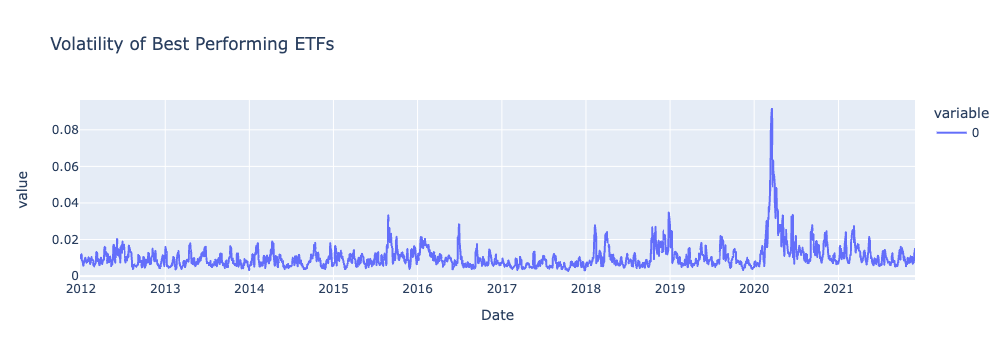

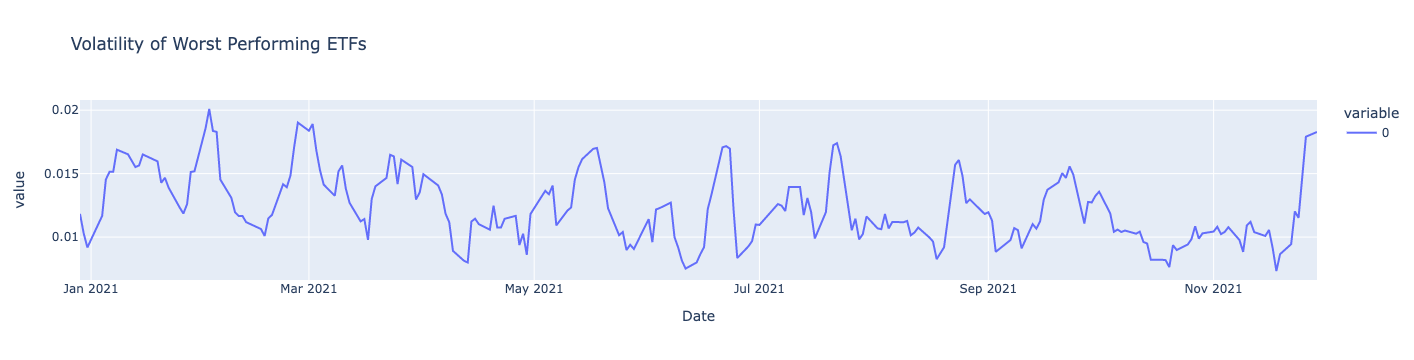

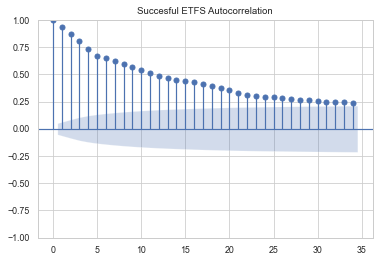

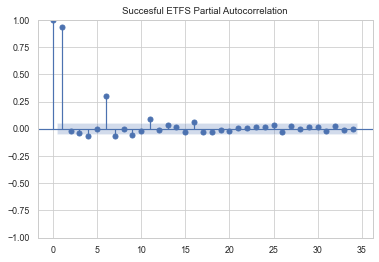

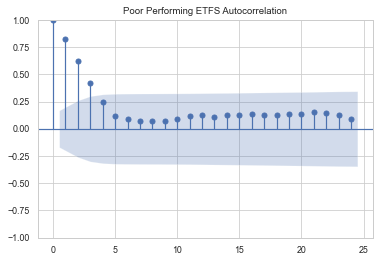

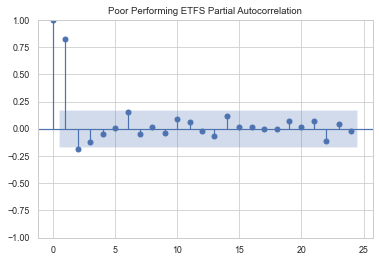

In [1681]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
def visual2():
    advanced_data, decline_data = insight3()
    advLin = px.line(advanced_data, title='Volatility of Best Performing ETFs')
    decLin = px.line(decline_data, title='Volatility of Worst Performing ETFs')
    px.line(decline_data)
    addFig = tsaplots.plot_acf(advanced_data, alpha=.01, adjusted=True, title='Succesful ETFS Autocorrelation')
    addFigP = tsaplots.plot_pacf(advanced_data,  method='ywm', alpha=.01, title='Succesful ETFS Partial Autocorrelation')
    decFig = tsaplots.plot_acf(decline_data, alpha=.01,adjusted=True, title='Poor Performing ETFS Autocorrelation')
    decFigP = tsaplots.plot_pacf(decline_data,  method='ywm', alpha=.01, title='Poor Performing ETFS Partial Autocorrelation')
    advLin.show()
    decLin.show()





############ Function Call ############
visual2()

### Visualization 2 Explanation

There are multiple graphs here but they all are meant to visualize the same component. This visualization of the best and worst performing investments shows how the volatility of both are quite similar. This was done by using plotly.line to model the standard deviation. 

Autocorrelation is the mathematical similarity of time series models with lagged versions. The purpose of identifying autocorrelation is to demonstrate that time series analysis is depending on previous data and not independent- consider it state dependent like a stochastic chain. 

Partial Autocorrelation is similar to autocorrelation but it also takes into account the lags in between the two different lagged versions. Partial autocorrelation is generally the better of the two at identifying statistically signficicantly lags. 

The plotted version of the autocorrelation and partial autocorrelation shows the statistical signficicance of a lagged time series after an n number of legs. The shaded blue is the confidence interval- any lag within that range is not statistically significant. However, lags such as n=6 are statistically significant and indicate an important lag period for autoregressive models (these lags were used in insight 4). 

Furthermore, these statistically significant lags also demonstrate seasonality- around every 6 or so periods there is a more significant lag. However the magnitude is dampened as time passes. 


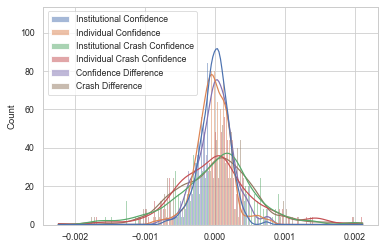

In [1660]:
import plotly.graph_objects as go
import scipy.stats
from scipy import stats
import plotly.figure_factory as ff
def visual3():
    grouped_df = create_grouped_df()
    grouped_df['Confidence Difference'] = grouped_df['Institutional Confidence']  -grouped_df['Individual Confidence']
    grouped_df['Crash Difference'] = grouped_df['Institutional Crash Confidence']  -grouped_df['Individual Crash Confidence']
    group_labels = ['Crash Difference']
    sns.histplot(grouped_df, kde=True, cbar=True, multiple='dodge', common_norm=True)
    return



############ Function Call ############
visual3()

### Visualization 3 Explanation

This model is a histogram plot of the confidence levels demonstrated in insight 1. This is much more well defined than the kde in pairgrid on visualization 2. The histograms overlayed truly show the big differences between all the sentiments. Specifcally- it demonstrates how people are much more volatile and fearful of crash than Confidence. This explains the must wider crash confidence. The confidence distribution is fairly skinny demonstrating smaller yet consistent changes in sentiment. 